<a href="https://colab.research.google.com/github/ZainabFatima507/Decision-Tree-/blob/main/project_birds_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook 

     |████████████████████████████████| 720 kB 4.0 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 189 kB 47.3 MB/s 
     |████████████████████████████████| 1.2 MB 30.1 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 51 kB 348 kB/s 


## Mounting Google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [ ]:
from fastai.vision.all import *
import matplotlib.image as immg
from PIL import Image
from fastai.vision.widgets import *
import gc,os,sys

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Downloading Data

In [ ]:
path = untar_data('https://s3.amazonaws.com/fast-ai-imageclas/CUB_200_2011.tgz')

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/CUB_200_2011/attributes.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011')]

In [ ]:
Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011').ls()

(#9) [Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'),Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images')]

In [ ]:
img_path = Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images')

## Analysing data

In [ ]:
fnames = get_image_files(img_path)
fnames[10]

Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0050_154898.jpg')

In [ ]:
img = Image.open(fnames[20])

In [ ]:
sz = np.array(img.shape)
sz/2

array([120., 120.])

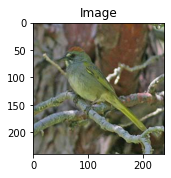

In [ ]:
plt.figure(1,figsize=(8,8))
plt.subplot(131)
plt.imshow(img)
plt.title('Image');

## Creating a data loader for training

In [ ]:
item_tfms = Resize(224)
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=32

In [ ]:
dls = ImageDataLoaders.from_folder(img_path, valid_pct=0.2,
                                   item_tfms=item_tfms, batch_tfms=batch_tfms, bs=64)

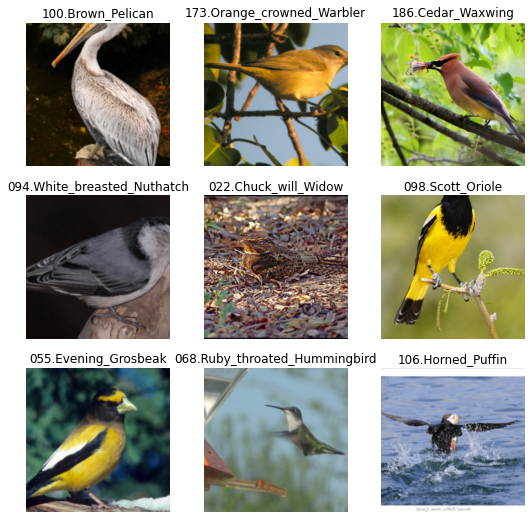

In [ ]:
dls.show_batch()

In [ ]:
len(dls.train_ds),len(dls.valid_ds)

(9431, 2357)

In [ ]:
aug_transforms?

In [ ]:
dls.c

200

### Training the Model

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy,F1Score(average='macro')]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
gc.collect()

17286

In [ ]:
cb1 = SaveModelCallback(monitor='f1_score',fname='best_model',comp=np.greater) # Callbacks
learn.fit_one_cycle(20, 1e-2, cbs =[cb1])

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,4.174531,2.160614,0.469241,0.444006,01:49
1,2.221162,1.641309,0.564277,0.546853,01:47
2,2.088287,1.711647,0.576156,0.561833,01:47
3,2.137412,2.243857,0.467543,0.449986,01:47
4,1.842837,1.608785,0.573611,0.550062,01:48
5,1.615836,1.461777,0.607552,0.585111,01:47
6,1.450391,1.533128,0.595248,0.578548,01:46
7,1.335232,1.498795,0.600764,0.580530,01:48
8,1.200193,1.219254,0.666950,0.661819,01:48
9,1.141463,1.071149,0.715316,0.708850,01:47


Better model found at epoch 0 with f1_score value: 0.44400636765291807.
Better model found at epoch 1 with f1_score value: 0.5468533022467695.
Better model found at epoch 2 with f1_score value: 0.5618333691318934.
Better model found at epoch 5 with f1_score value: 0.585111119382946.
Better model found at epoch 8 with f1_score value: 0.6618191750388533.
Better model found at epoch 9 with f1_score value: 0.7088502265351185.
Better model found at epoch 11 with f1_score value: 0.7211371954135237.
Better model found at epoch 14 with f1_score value: 0.745205441076995.
Better model found at epoch 16 with f1_score value: 0.7585096181156336.
Better model found at epoch 17 with f1_score value: 0.7602747106975258.
Better model found at epoch 18 with f1_score value: 0.7614483400510592.
Better model found at epoch 19 with f1_score value: 0.7622041806639368.


## Interpreting Results

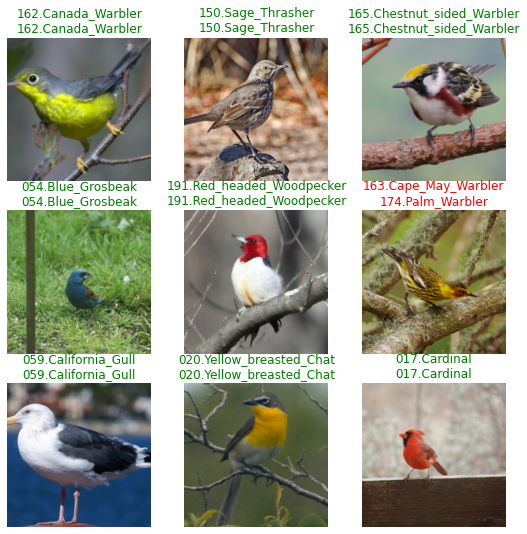

In [24]:
learn.show_results()

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
#interp.plot_confusion_matrix(figsize=(20,14))

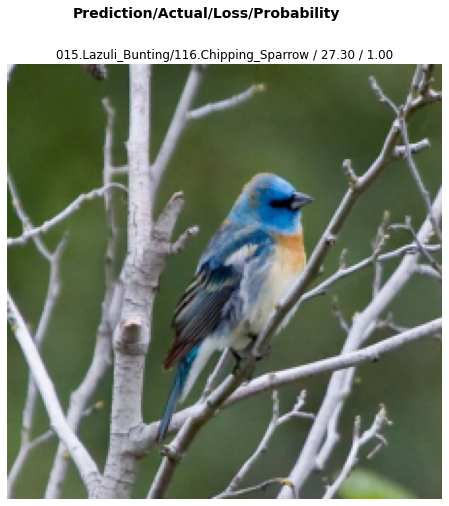

In [26]:
interp.plot_top_losses(k=1,figsize=(20,8))

In [27]:
learn = learn.to_fp32()
learn.export('/content/birds_export.pkl');

In [28]:
!cp '/content/birds_export.pkl' '/content/drive/MyDrive'

## Inference

In [29]:
!pip install -qq gradio

     |████████████████████████████████| 979 kB 4.1 MB/s 
     |████████████████████████████████| 206 kB 6.7 MB/s 
     |████████████████████████████████| 2.0 MB 6.9 MB/s 
     |████████████████████████████████| 3.6 MB 32.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 961 kB 29.3 MB/s 


In [30]:
import gradio as gr

In [31]:
inf_learn = load_learner('/content/birds_export.pkl',cpu=True);

In [32]:
for i in range(10):
    dls.valid_ds[i][0].save(f'valid_bird_img{i}.png')

In [33]:
def image_classifier(img):
    pred_c,pred_idx,prob = inf_learn.predict(img)
    cls = str(pred_c)[4:]
    res = f"Class : {cls}"
    return res

iface = gr.Interface(
    fn = image_classifier, 
    inputs = gr.inputs.Image(shape=(224, 224)), 
    #gr.outputs.Label(num_top_classes=3),
    outputs = "text");

if __name__ == "__main__":
    iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://26718.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app
